### Here we will practice the fundamentals of Tensorflow and build basic models

In [58]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential # what kind of model we are building
from tensorflow.keras.layers import Dense      # what kind of layers we are adding to the model
from tensorflow.keras.optimizers import Adam

In [11]:
dataset_reg = pd.read_csv('input/fake_reg.csv', delimiter=',',
                         encoding='UTF-8')

In [15]:
dataset_reg.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


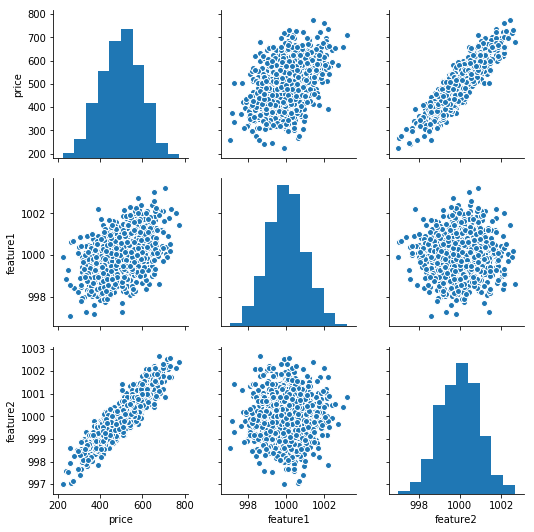

In [18]:
sns.pairplot(dataset_reg)

In [20]:
# we will split the dataset into train and test
X = dataset_reg[['feature1', 'feature2']].values
y = dataset_reg['price'].values

In [22]:
X.shape, y.shape

((1000, 2), (1000,))

In [25]:
# use shift + TAB to access the documentation and use sample code
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [28]:
# now we will scale down the features using minmax scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [59]:
# help(Sequential)-> this can be used for looking into the documentation
# now we will make the model

# instantiated a sequential model
model = Sequential()

# now add layers
model.add(Dense(units=4, activation='relu')) # input layer
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1)) # final layer

# now we need to define the optimizer and loss function
# since we are solving a regression problem, we will keep loss as MSE
optimizer = Adam(lr=0.01)
model.compile(optimizer=optimizer,
             loss='mse')

In [60]:
model.fit(x=X_train, y=y_train, epochs=200);

Epoch 1/200
700/700 [==============================] - 1s 2ms/step - loss: 256706.0657
Epoch 2/200
700/700 [==============================] - 0s 134us/step - loss: 255900.0960
Epoch 3/200
700/700 [==============================] - 0s 157us/step - loss: 252687.7903
Epoch 4/200
700/700 [==============================] - 0s 113us/step - loss: 242118.4874
Epoch 5/200
700/700 [==============================] - 0s 160us/step - loss: 214863.8565
Epoch 6/200
700/700 [==============================] - 0s 147us/step - loss: 158104.1250
Epoch 7/200
700/700 [==============================] - 0s 226us/step - loss: 74981.9080
Epoch 8/200
700/700 [==============================] - 0s 274us/step - loss: 13036.7906
Epoch 9/200
700/700 [==============================] - 0s 276us/step - loss: 2945.2268
Epoch 10/200
700/700 [==============================] - 0s 230us/step - loss: 2653.7690
Epoch 11/200
700/700 [==============================] - 0s 236us/step - loss: 2505.8983
Epoch 12/200
700/700 [=======

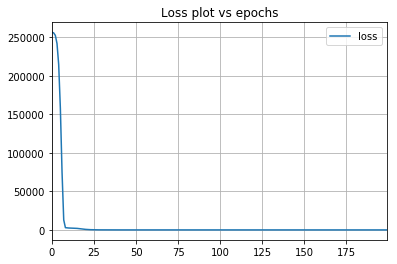

In [63]:
loss_df = pd.DataFrame(model.history.history) # model.history.history gets historical training loss
loss_df.plot(title='Loss plot vs epochs',
             grid=True)